# Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import exp

In [2]:
seed = 22

There are 4 variation of the dataset. Each one has gone through different preprocessing. We will evaluate them all to compare their performance.

In [3]:
test_results = {}

## Normalized only

Each numerical catagory is normalized to be between 0 and 1.

In [4]:
norm_model = LogisticRegression(
    solver='liblinear',
    random_state=seed
)

In [5]:
train_file_norm = './processed_data/train_normed'
test_file_norm = './processed_data/test_normed'

In [6]:
train_norm = pd.read_pickle(train_file_norm)
test_norm = pd.read_pickle(test_file_norm)

In [7]:
y_train_norm = train_norm['STATUS']
X_train_norm = train_norm.drop(['STATUS', 'FUEL'], axis=1)

y_test_norm = test_norm['STATUS']
X_test_norm = test_norm.drop(['STATUS', 'FUEL'], axis=1)

In [8]:
norm_model.fit(X_train_norm, y_train_norm)

LogisticRegression(random_state=22, solver='liblinear')

In [9]:
train_accur_norm = norm_model.score(X_train_norm, y_train_norm)
test_accur_norm = norm_model.score(X_test_norm, y_test_norm)

In [10]:
test_results['Normalized'] = test_accur_norm

## Normalized and Sizes

The size value is restored to it's measured size before the data is normalized to be between 0 and 1.

l2 normalization is applied by default in sklearn's implementation of logistic regression.

In [11]:
norm_size_model = LogisticRegression(
    #solver='liblinear',
    random_state=seed
)

In [12]:
train_file_norm_size = './processed_data/train_normed_size'
test_file_norm_size = './processed_data/test_normed_size'

In [13]:
train_norm_size = pd.read_pickle(train_file_norm_size)
test_norm_size = pd.read_pickle(test_file_norm_size)

In [14]:
y_train_norm_size = train_norm_size['STATUS']
X_train_norm_size = train_norm_size.drop(['STATUS', 'FUEL'], axis=1)

y_test_norm_size = test_norm_size['STATUS']
X_test_norm_size = test_norm_size.drop(['STATUS', 'FUEL'], axis=1)

In [15]:
norm_size_model.fit(X_train_norm_size, y_train_norm_size)

LogisticRegression(random_state=22)

In [16]:
train_accur_norm_size = norm_size_model.score(X_train_norm_size, y_train_norm_size)
test_accur_norm_size = norm_size_model.score(X_test_norm_size, y_test_norm_size)

In [17]:
train_accur_norm_size

0.8985237207969041

In [18]:
test_results['Normalized and Size'] = test_accur_norm_size

## Normalized and dB

The decibels values are exponentiated before before the data is normalized to be between 0 and 1.

In [19]:
norm_dB_model = LogisticRegression(
    #solver='liblinear',
    random_state=seed
)

In [20]:
train_file_norm_dB = './processed_data/train_normed_dB'
test_file_norm_dB = './processed_data/test_normed_dB'

In [21]:
train_norm_dB = pd.read_pickle(train_file_norm_dB)
test_norm_dB = pd.read_pickle(test_file_norm_dB)

In [22]:
y_train_norm_dB = train_norm_dB['STATUS']
X_train_norm_dB = train_norm_dB.drop(['STATUS', 'FUEL'], axis=1)

y_test_norm_dB = test_norm_dB['STATUS']
X_test_norm_dB = test_norm_dB.drop(['STATUS', 'FUEL'], axis=1)

In [23]:
norm_dB_model.fit(X_train_norm_dB, y_train_norm_dB)

LogisticRegression(random_state=22)

In [24]:
train_accur_norm_dB = norm_dB_model.score(X_train_norm_dB, y_train_norm_dB)
test_accur_norm_dB = norm_dB_model.score(X_test_norm_dB, y_test_norm_dB)

In [25]:
train_accur_norm_dB

0.897878744446037

In [26]:
test_results['Normalized and dB'] = test_accur_norm_dB

## Normalized and dB and Size Adjusted

This includes both the size and dB adjustments before the data is normalized.

In [27]:
norm_dB_size_model = LogisticRegression(
    #solver='liblinear',
    random_state=seed
)

In [28]:
train_file_norm_dB_size = './processed_data/train_normed_size_dB'
test_file_norm_dB_size = './processed_data/test_normed_size_dB'

In [29]:
train_norm_dB_size = pd.read_pickle(train_file_norm_dB_size)
test_norm_dB_size = pd.read_pickle(test_file_norm_dB_size)

In [30]:
y_train_norm_dB_size = train_norm_dB_size['STATUS']
X_train_norm_dB_size = train_norm_dB_size.drop(['STATUS', 'FUEL'], axis=1)

y_test_norm_dB_size = test_norm_dB_size['STATUS']
X_test_norm_dB_size = test_norm_dB_size.drop(['STATUS', 'FUEL'], axis=1)

In [31]:
norm_dB_size_model.fit(X_train_norm_dB_size, y_train_norm_dB_size)

LogisticRegression(random_state=22)

In [32]:
train_accur_norm_dB_size = norm_dB_size_model.score(X_train_norm_dB_size, y_train_norm_dB_size)
test_accur_norm_dB_size = norm_dB_size_model.score(X_test_norm_dB_size, y_test_norm_dB_size)

In [33]:
train_accur_norm_dB_size

0.8980937365629927

In [34]:
test_accur_norm_dB_size

0.9033830275229358

In [35]:
test_results['Normalized, dB, and Size'] = test_accur_norm_dB_size

### Evaluate the Results of Different Data Processing

In [36]:
test_results

{'Normalized': 0.9019495412844036,
 'Normalized and Size': 0.9019495412844036,
 'Normalized and dB': 0.9028096330275229,
 'Normalized, dB, and Size': 0.9033830275229358}

In [37]:
print('normalized accuracy:            {:.2%}'.format(test_results['Normalized']))
print('normalized, size accuracy:      {:.2%}'.format(test_results['Normalized and Size']))
print('normalized, dB accuracy:        {:.2%}'.format(test_results['Normalized and dB']))
print('normalized, size, dB accuracy:  {:.2%}'.format(test_results['Normalized, dB, and Size']))

normalized accuracy:            90.19%
normalized, size accuracy:      90.19%
normalized, dB accuracy:        90.28%
normalized, size, dB accuracy:  90.34%


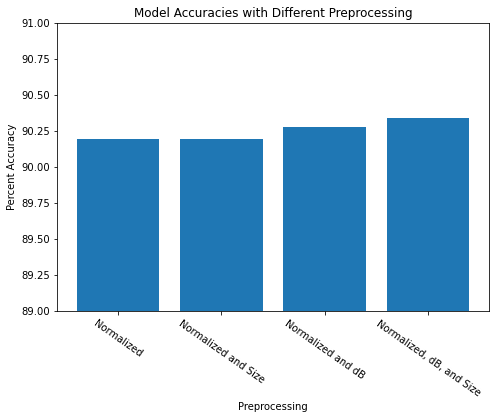

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = test_results.keys()
accur = test_results.values()
accur = [100* x for x in accur]
ax.bar(labels, accur)

plt.xticks(list(labels), labels, rotation =-35)


plt.title('Model Accuracies with Different Preprocessing')
plt.xlabel('Preprocessing')
plt.ylabel('Percent Accuracy')


plt.ylim(89, 91)
plt.show()

### Tuning C on the best model

Regularization (l2) is applied by default on the logistic regression. The strength of the regularization is controlled with the hyperparameter `C`. We will evaluate different values of `C` on with the best model. Smaller values of C mean more regularization

In [39]:
c_range = [.01, .1, .5, 1, 1.5, 2, 3, 4, 6, 8, 10, 12, 16, 20 ]
train_accuracies = []
test_accuracies = []

for c in c_range:
    model = LogisticRegression(
        random_state=seed,
        C=c
    )
    model.fit(X_train_norm_dB_size, y_train_norm_dB_size)
    train_accur = model.score(X_train_norm_dB_size, y_train_norm_dB_size)
    test_accur = model.score(X_test_norm_dB_size, y_test_norm_dB_size)
    
    train_accuracies.append(train_accur)
    test_accuracies.append(test_accur)

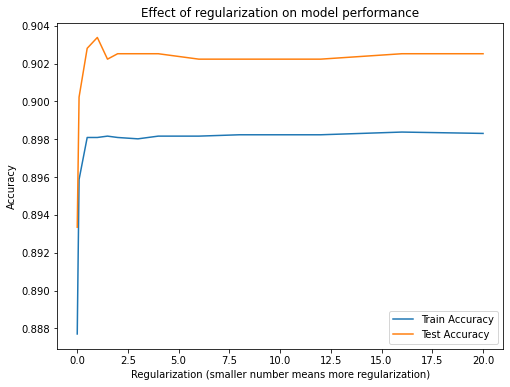

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(c_range, train_accuracies, label='Train Accuracy')
ax.plot(c_range, test_accuracies, label='Test Accuracy')

plt.legend(loc="lower right")

plt.title('Effect of regularization on model performance')
plt.xlabel('Regularization (smaller number means more regularization)')
plt.ylabel('Accuracy')
plt.show()

In [41]:
# print the best C
c_range[test_accuracies.index(max(test_accuracies))]

1

We can see that the peak accuracy was achieved at a `C` of 1, which is the default value.

## Model for Each Fuel

With 4 types of fuel, we will train 4 models. The test set is spit by fuel and each fuel will be tested separately. Since there are inequal samples for each fuel in the test set, we cannot just average the accuracies. 

### Load the Data

In [42]:
stem = './processed_data/'
train_gasoline_filepath = stem + 'train_gasoline.pickle'
train_thinner_filepath = stem + 'train_thinner.pickle'
train_kerosene_filepath = stem + 'train_kerosene.pickle'
train_lpg_filepath = stem + 'train_lpg.pickle'

test_gasoline_filepath = stem + 'test_gasoline.pickle'
test_thinner_filepath = stem + 'test_thinner.pickle'
test_kerosene_filepath = stem + 'test_kerosene.pickle'
test_lpg_filepath = stem + 'test_lpg.pickle'

In [43]:
train_gasoline = pd.read_pickle(train_gasoline_filepath)
train_thinner = pd.read_pickle(train_thinner_filepath)
train_kerosene = pd.read_pickle(train_kerosene_filepath)
train_lpg = pd.read_pickle(train_lpg_filepath)

test_gasoline = pd.read_pickle(test_gasoline_filepath)
test_thinner = pd.read_pickle(test_thinner_filepath)
test_kerosene = pd.read_pickle(test_kerosene_filepath)
test_lpg = pd.read_pickle(test_lpg_filepath)

Split the data into x and y for the model.

In [44]:
# gasoline
train_gasoline_X = train_gasoline
train_gasoline_y = train_gasoline['STATUS']
train_gasoline_X = train_gasoline_X.drop(['STATUS'], axis=1)

test_gasoline_X = test_gasoline
test_gasoline_y = test_gasoline['STATUS']
test_gasoline_X = test_gasoline_X.drop(['STATUS'], axis=1)

# thinner
train_thinner_X = train_thinner
train_thinner_y = train_thinner['STATUS']
train_thinner_X = train_thinner.drop(['STATUS'], axis=1)

test_thinner_X = test_thinner
test_thinner_y = test_thinner['STATUS']
test_thinner_X = test_thinner.drop(['STATUS'], axis=1)

# kerosene
train_kerosene_X = train_kerosene
train_kerosene_y = train_kerosene['STATUS']
train_kerosene_X = train_kerosene.drop(['STATUS'], axis=1)

test_kerosene_X = test_kerosene
test_kerosene_y = test_kerosene['STATUS']
test_kerosene_X = test_kerosene.drop(['STATUS'], axis=1)

# lpg
train_lpg_X = train_lpg
train_lpg_y = train_lpg['STATUS']
train_lpg_X = train_lpg.drop(['STATUS'], axis=1)

test_lpg_X = test_lpg
test_lpg_y = test_lpg['STATUS']
test_lpg_X = test_lpg.drop(['STATUS'], axis=1)

### Train the Models

In [45]:
gasoline_model = LogisticRegression(
    random_state=seed
)

thinner_model = LogisticRegression(
    random_state=seed
)

kerosene_model = LogisticRegression(
    random_state=seed
)

lpg_model = LogisticRegression(
    random_state=seed
)

In [46]:
gasoline_model.fit(train_gasoline_X, train_gasoline_y)
thinner_model.fit(train_thinner_X, train_thinner_y)
kerosene_model.fit(train_kerosene_X, train_kerosene_y)
lpg_model.fit(train_lpg_X, train_lpg_y)

LogisticRegression(random_state=22)

### Evaluate Results

In [47]:
acccuracy_gasoline = gasoline_model.score(test_gasoline_X, test_gasoline_y)
acccuracy_thinner = thinner_model.score(test_thinner_X, test_thinner_y)
acccuracy_kerosene = kerosene_model.score(test_kerosene_X, test_kerosene_y)
acccuracy_lpg = lpg_model.score(test_lpg_X, test_lpg_y)

In [48]:
print('gasoline accuracy: {:.2%}'.format(acccuracy_gasoline))
print('thinner accuracy:  {:.2%}'.format(acccuracy_thinner))
print('kerosene accuracy: {:.2%}'.format(acccuracy_kerosene))
print('lpg accuracy:      {:.2%}'.format(acccuracy_lpg))

gasoline accuracy: 90.58%
thinner accuracy:  90.46%
kerosene accuracy: 92.36%
lpg accuracy:      86.55%


There are a different number of examples in each fuel types, so we cannot average the accuracies. Instead we can sum the total number of correct predictions and divide by the total predictions.

In [49]:
number_correct = sum(gasoline_model.predict(test_gasoline_X) == test_gasoline_y)  \
                + sum(thinner_model.predict(test_thinner_X) == test_thinner_y)    \
                + sum(kerosene_model.predict(test_kerosene_X) == test_kerosene_y) \
                + sum(lpg_model.predict(test_lpg_X) == test_lpg_y)

number_total = len(test_gasoline_y) + len(test_thinner_y) + len(test_kerosene_y) + len(test_lpg_y)
total_accuracy = number_correct / number_total

In [50]:
print('total accuracy: {:.2%}'.format(total_accuracy))

total accuracy: 90.62%


The model trained on each fuel type individually performed better than the model that takes fuel as a parameter. This indicates that the fires for each fuel type do not respond to the other inputs in the same way.

The kerosene model performs above average and the lpg model performs lower than average. It may help to see if the other combined model performs poorly on lpg too.

In [51]:
combined_model_lpg_X = X_test_norm_dB_size.loc[X_test_norm_dB_size['isLpg'] == 1]
combined_model_lpg_y = y_test_norm_dB_size.loc[X_test_norm_dB_size['isLpg'] == 1]

In [52]:
test_accur_norm_dB_size_lpg = norm_dB_size_model.score(combined_model_lpg_X, combined_model_lpg_y)

In [53]:
print('combined model accuracy on lpg: {:.2%}'.format(test_accur_norm_dB_size_lpg))

combined model accuracy on lpg: 85.03%


The combined model also performs poorly on lpg. The model that trained just on lpg performs better though. This indicates that the models have a harder time predicting on lpg compaired to the liquid fuels.

### Performance of All Models

In [54]:
test_results['1 model per fuel'] = total_accuracy

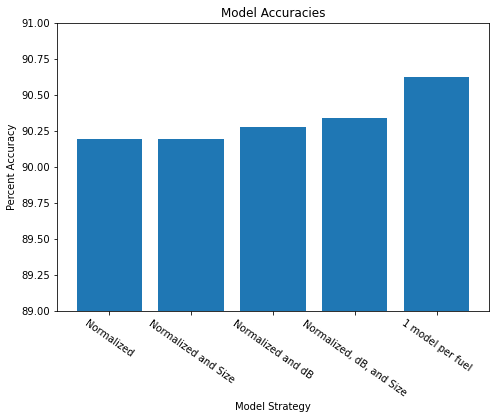

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = test_results.keys()
accur = test_results.values()
accur = [100* x for x in accur]
ax.bar(labels, accur)

plt.xticks(list(labels), labels, rotation =-35)


plt.title('Model Accuracies')
plt.xlabel('Model Strategy')
plt.ylabel('Percent Accuracy')


plt.ylim(89, 91)
plt.show()

## Model Interpretation

Now that we have trained out model, we can interpret the results by looking at the parameters.

In [56]:
# Extract weights and names from best single model
weights = []
for pair in zip(norm_dB_size_model.feature_names_in_, norm_dB_size_model.coef_[0]):
    weights.append(pair)
b = norm_dB_size_model.intercept_

In [57]:
weights

[('SIZE', -4.314819641567483),
 ('DISTANCE', -4.175046182254796),
 ('DESIBEL', 0.1560794642760687),
 ('AIRFLOW', 9.192568377290065),
 ('FREQUENCY', -2.6792373506397844),
 ('isGasoline', 0.9197780715561672),
 ('isThinner', 0.24822983007680116),
 ('isKerosene', -0.3036174476954272),
 ('isLpg', -0.8652779171779615)]

In [58]:
b

array([1.73916454])

With these weights, we can manually make a prediction

In [59]:
# make a prediction
s = .5
d = .3
db = .6
a = .4
f = .2
g = 1
t = 0
k = 0
l = 0

w_x = s * weights[0][1] + d * weights[1][1] + db * weights[2][1] + \
      a * weights[3][1] + f * weights[4][1] + g * weights[5][1] + \
      t * weights[6][1] + k * weights[7][1] + l * weights[8][1] + b

p_1 = 1 / (1 + exp(-w_x.item()))
p_1

0.9230016123098124

We can compare this to the model's prediction for the same data.

In [60]:
x = [s, d, db, a, f, g, t, k, l]
x = np.array(x).reshape(1, len(x))
x

array([[0.5, 0.3, 0.6, 0.4, 0.2, 1. , 0. , 0. , 0. ]])

In [61]:
norm_dB_size_model.predict_proba(x)

C:\Users\Andrew\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.07699839, 0.92300161]])

We can see that the probabilities match. The outut of the last cell is the probability of the sample belonging to clas 0 and then the probability it is in class 1.

With the weights confirmed, we can make interpretations.

The weights for the fuels tell us the relative ease that different fires can be put out. The bigger the weight, the easier it is to extinguish. 

```
Gasoline:  0.9198
Thinner:   0.2482
Kerosene: -0.3036
lpg:      -0.8653
 ```
 
Gasoline is is the easiest and lpg is the most difficult.

The effects of the mechanisms of the acoustic fire extinguisher can be evaluated in a similar way.

```
DESIBEL:    0.1561
AIRFLOW:    9.1926
FREQUENCY: -2.6792
```

The decibels and airflow are positively correlated with the ability to extinguish the flames, while frequency was negatively correlated, meaning lower frequencies performed better.

The ideal system would maximize airflow and decibels and minimize frequency. The relative importance of these features can be gleaned from the magnitudes.

## Resources
* matplotlib
    + https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/
    + https://matplotlib.org/3.5.0/api/text_api.html#matplotlib.text.Text
    + https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
* logistic regression
    + https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    + https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    